**Wymagane pakiety:**
- `numpy`
- `matplotlib`

# Inicjalizacja

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams["figure.figsize"] = (10, 10)
mpl.rcParams["lines.linestyle"] = ""
mpl.rcParams["lines.marker"] = ","
mpl.rcParams["lines.markerfacecolor"] = "b"
mpl.rcParams["lines.markeredgecolor"] = "b"

# Generowanie zbiorów

In [2]:
def generatePointsRect(minX, maxX, minY, maxY, count, dtype):
    x = np.random.uniform(minX, maxX, count).astype(dtype)
    y = np.random.uniform(minY, maxY, count).astype(dtype)
    
    return x, y

def generatePointsCircle(radius, count, dtype):
    fi = np.random.uniform(0, 2 * np.pi, count).astype(dtype)
    
    x = np.cos(fi) * radius
    y = np.sin(fi) * radius
    
    return x, y

def generatePointsLine(aX, aY, bX, bY, scale, count, dtype):
    middle = [(aX + bX) / 2, (aY + bY) / 2]
    
    # difference between middle and B
    diff = np.array([bX - middle[0], bY - middle[1]])
    
    # generate scalar
    move = np.random.uniform(-scale, scale, count).astype(dtype)
    
    # our point is: middle + difference between middle and B multiplicated by scale (double-ended range)
    x = middle[0] + move * diff[0]
    y = middle[1] + move * diff[1]
    
    return x, y

# scales axes by given limits which are multiplied by scale
def scaleAxes(limits, scale):
    plt.axis((np.array(limits) * scale).tolist())

# Zadania

## 2.a

float64


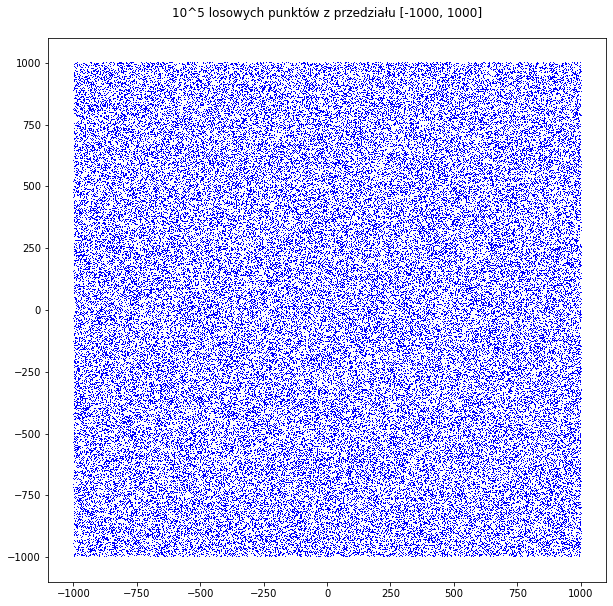

In [3]:
limits = [-1000, 1000, -1000, 1000]
x, y = generatePointsRect(*limits, 10 ** 5, "float64")
print(x.dtype)

scaleAxes(limits, 1.1)
plt.title("10^5 losowych punktów z przedziału [-1000, 1000]\n")
plt.plot(x, y)

## 2.b

float64


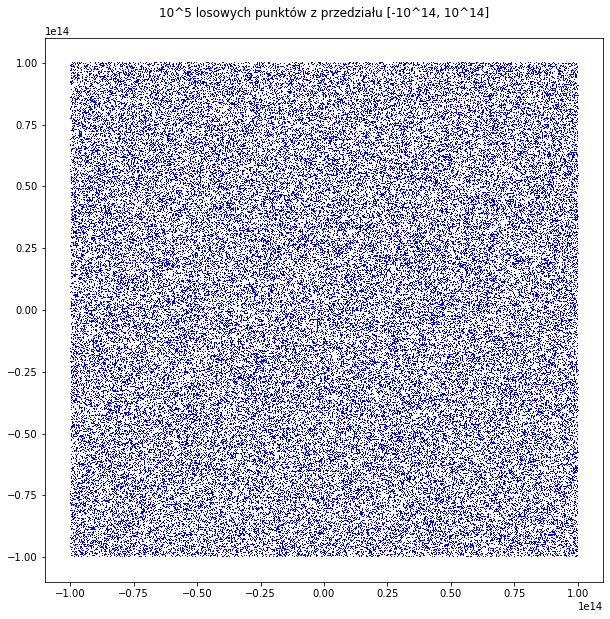

In [4]:
limits = [-10 ** 14, 10 ** 14, -10 ** 14, 10 ** 14]
x, y = generatePointsRect(*limits, 10 ** 5, "float64")
print(x.dtype)

scaleAxes(limits, 1.1)
plt.title("10^5 losowych punktów z przedziału [-10^14, 10^14]\n")
plt.plot(x, y)

## 2.c

float64


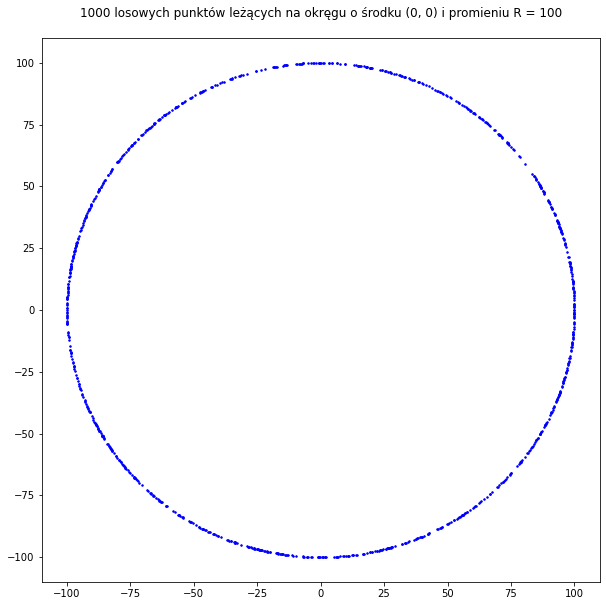

In [5]:
limits = [-100, 100, -100, 100]
x, y = generatePointsCircle(100, 1000, "float64")
print(x.dtype)

scaleAxes(limits, 1.1)
plt.title("1000 losowych punktów leżących na okręgu o środku (0, 0) i promieniu R = 100\n")
plt.plot(x, y, ".", ms=3)

## 2.d

float64


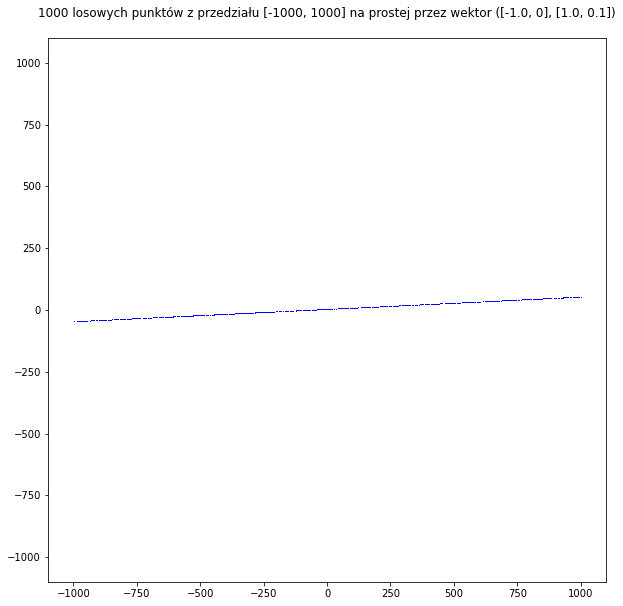

In [6]:
limits = [-1000, 1000, -1000, 1000]
a = np.array([-1.0, 0.0])
b = np.array([1.0, 0.1])
print(x.dtype)

x, y = generatePointsLine(*a, *b, 1000, 1000, "float64")

scaleAxes(limits, 1.1)
plt.title("1000 losowych punktów z przedziału [-1000, 1000] na prostej przez wektor ([-1.0, 0], [1.0, 0.1])\n")
plt.plot(x, y)

## 4

------Zbiór danych: 10^5 punktów w [-1000, 1000]
cnt:
float32,detOwn2,0.000000e+00,49956,50044,0
float32,detNP2,0.000000e+00,49956,50044,0
float32,detOwn3,0.000000e+00,49956,50044,0
float32,detNP3,0.000000e+00,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


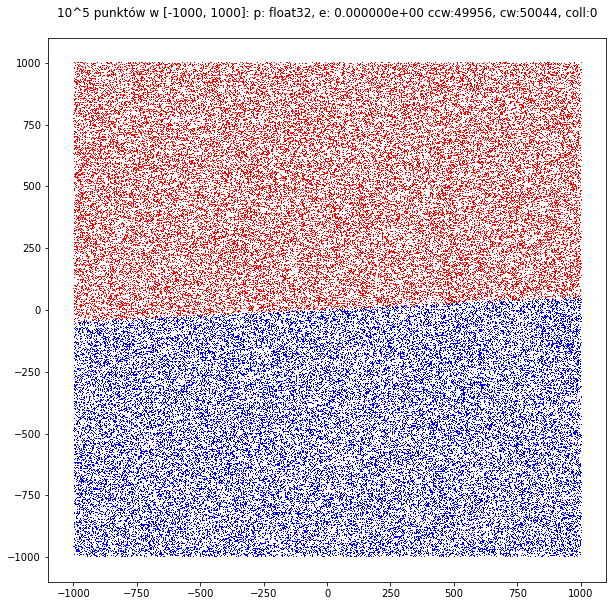

cnt:
float32,detOwn2,1.000000e-13,49956,50044,0
float32,detNP2,1.000000e-13,49956,50044,0
float32,detOwn3,1.000000e-13,49956,50044,0
float32,detNP3,1.000000e-13,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


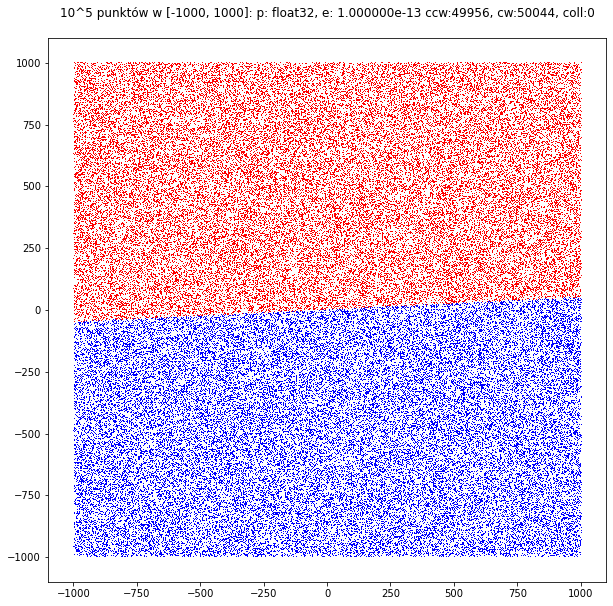

cnt:
float32,detOwn2,1.000000e-09,49956,50044,0
float32,detNP2,1.000000e-09,49956,50044,0
float32,detOwn3,1.000000e-09,49956,50044,0
float32,detNP3,1.000000e-09,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


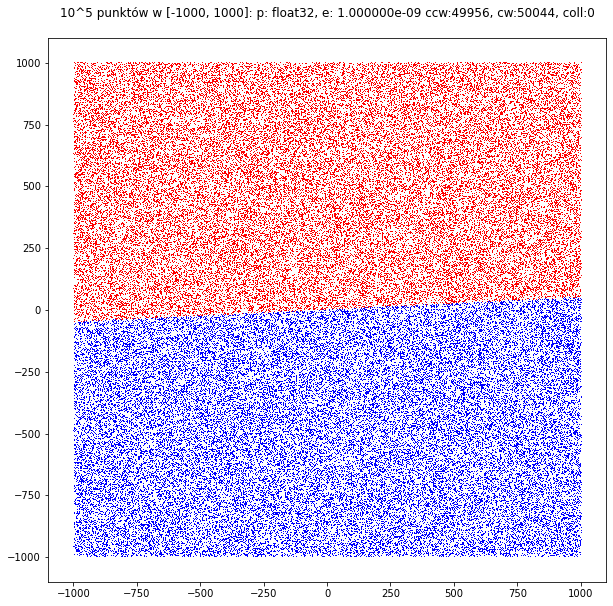

cnt:
float32,detOwn2,1.000000e-05,49956,50044,0
float32,detNP2,1.000000e-05,49956,50044,0
float32,detOwn3,1.000000e-05,49956,50044,0
float32,detNP3,1.000000e-05,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


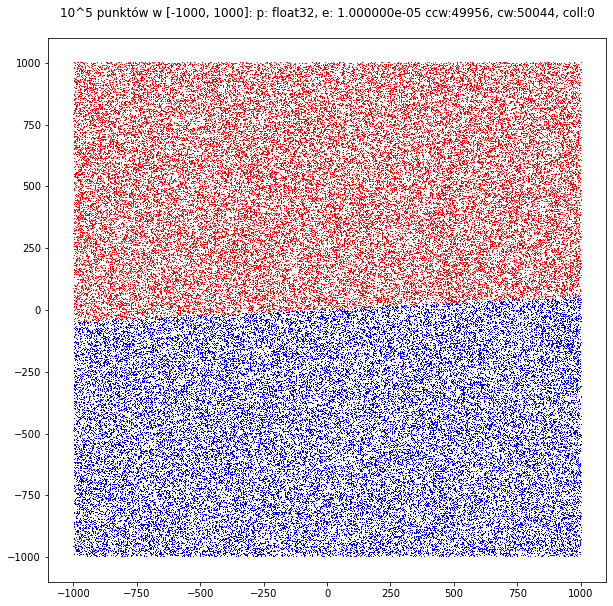

cnt:
float32,detOwn2,1.000000e-01,49954,50039,7
float32,detNP2,1.000000e-01,49954,50039,7
float32,detOwn3,1.000000e-01,49954,50039,7
float32,detNP3,1.000000e-01,49954,50039,7
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


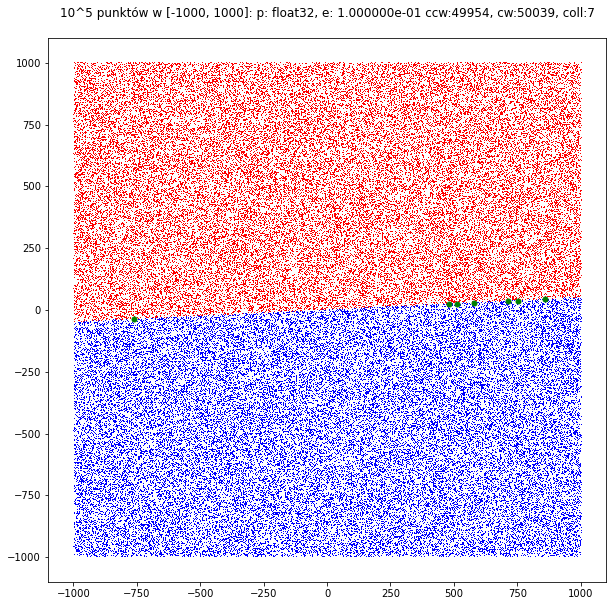

cnt:
float64,detOwn2,0.000000e+00,49956,50044,0
float64,detNP2,0.000000e+00,49956,50044,0
float64,detOwn3,0.000000e+00,49956,50044,0
float64,detNP3,0.000000e+00,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


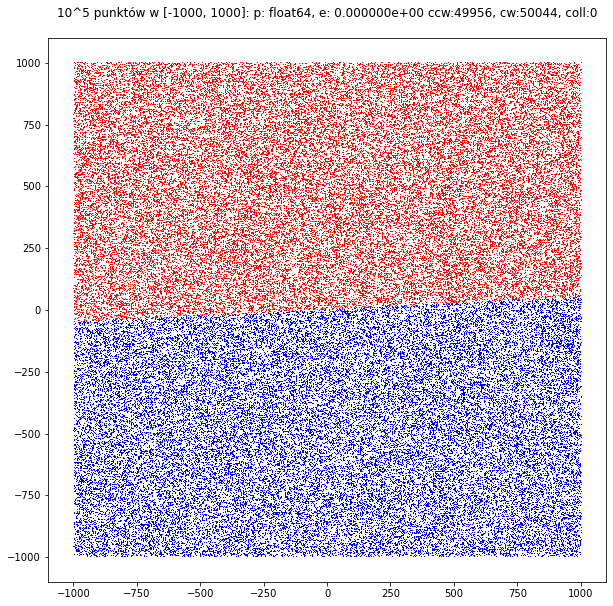

cnt:
float64,detOwn2,1.000000e-13,49956,50044,0
float64,detNP2,1.000000e-13,49956,50044,0
float64,detOwn3,1.000000e-13,49956,50044,0
float64,detNP3,1.000000e-13,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


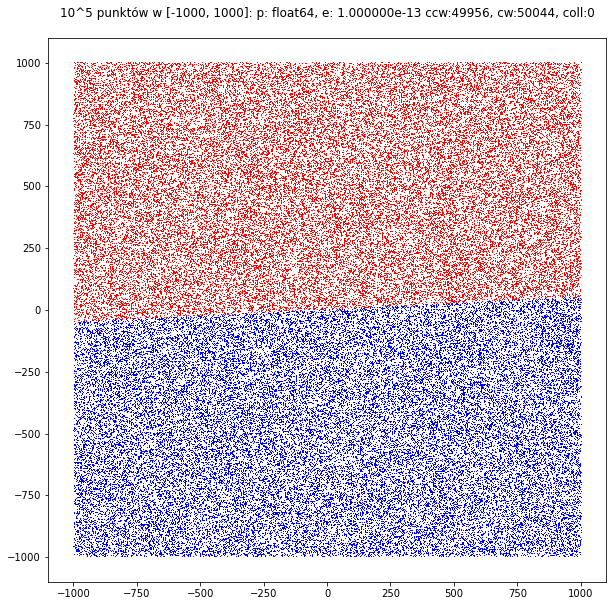

cnt:
float64,detOwn2,1.000000e-09,49956,50044,0
float64,detNP2,1.000000e-09,49956,50044,0
float64,detOwn3,1.000000e-09,49956,50044,0
float64,detNP3,1.000000e-09,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


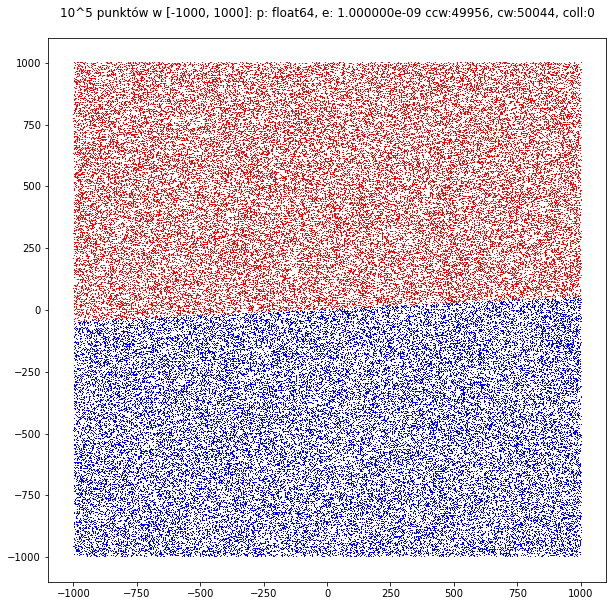

cnt:
float64,detOwn2,1.000000e-05,49956,50044,0
float64,detNP2,1.000000e-05,49956,50044,0
float64,detOwn3,1.000000e-05,49956,50044,0
float64,detNP3,1.000000e-05,49956,50044,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


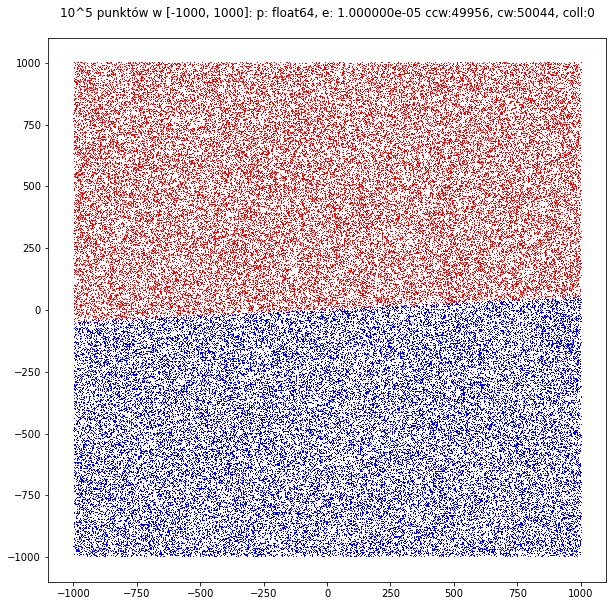

cnt:
float64,detOwn2,1.000000e-01,49954,50039,7
float64,detNP2,1.000000e-01,49954,50039,7
float64,detOwn3,1.000000e-01,49954,50039,7
float64,detNP3,1.000000e-01,49954,50039,7
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


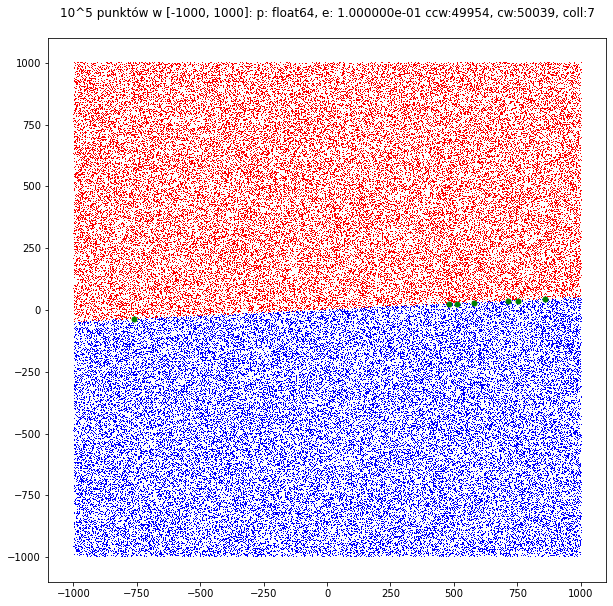

------Zbiór danych: 10^5 punktów w [-10^14, 10^14]
cnt:
float32,detOwn2,0.000000e+00,50179,49813,8
float32,detNP2,0.000000e+00,50177,49814,9
float32,detOwn3,0.000000e+00,50181,49819,0
float32,detNP3,0.000000e+00,50181,49819,0
diff:
detOwn2,detNP2,7
detOwn2,detOwn3,8
detOwn2,detNP3,8
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


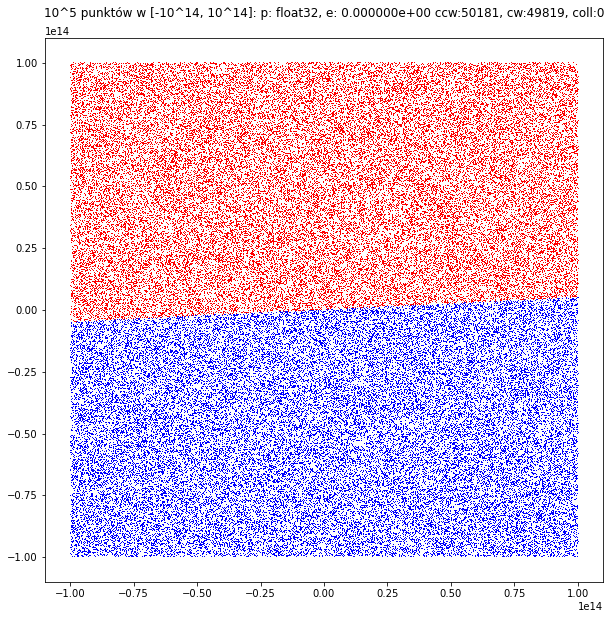

cnt:
float32,detOwn2,1.000000e-13,50179,49813,8
float32,detNP2,1.000000e-13,50177,49814,9
float32,detOwn3,1.000000e-13,50181,49819,0
float32,detNP3,1.000000e-13,50181,49819,0
diff:
detOwn2,detNP2,7
detOwn2,detOwn3,8
detOwn2,detNP3,8
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


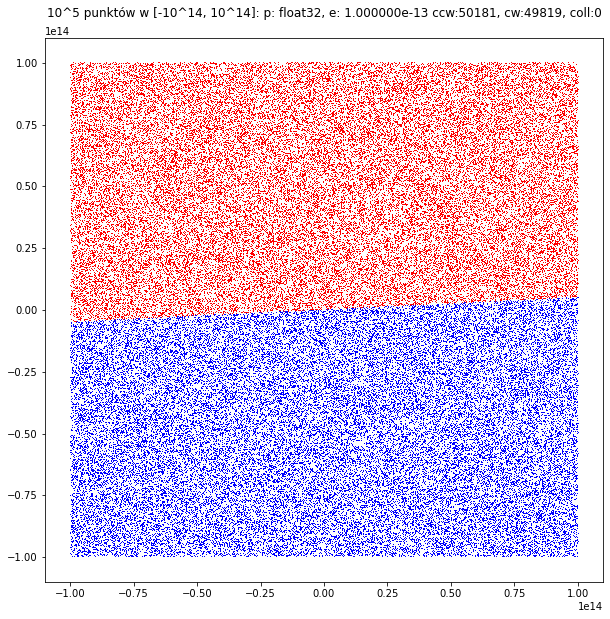

cnt:
float32,detOwn2,1.000000e-09,50179,49813,8
float32,detNP2,1.000000e-09,50177,49814,9
float32,detOwn3,1.000000e-09,50181,49819,0
float32,detNP3,1.000000e-09,50181,49819,0
diff:
detOwn2,detNP2,7
detOwn2,detOwn3,8
detOwn2,detNP3,8
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


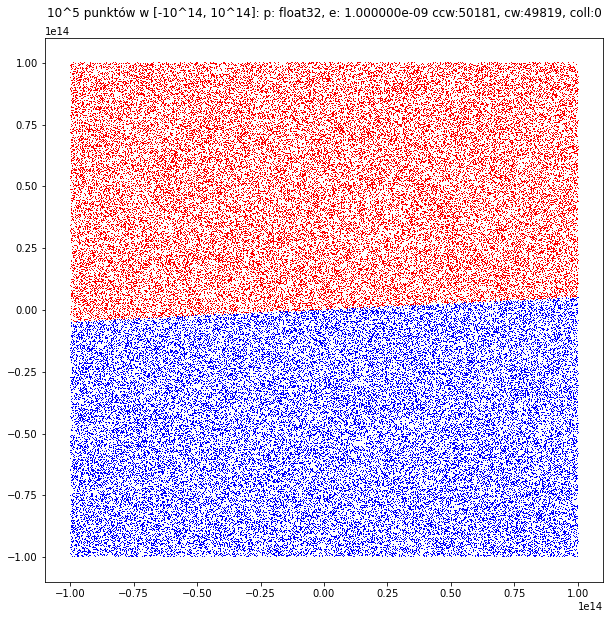

cnt:
float32,detOwn2,1.000000e-05,50179,49813,8
float32,detNP2,1.000000e-05,50177,49814,9
float32,detOwn3,1.000000e-05,50181,49819,0
float32,detNP3,1.000000e-05,50181,49819,0
diff:
detOwn2,detNP2,7
detOwn2,detOwn3,8
detOwn2,detNP3,8
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


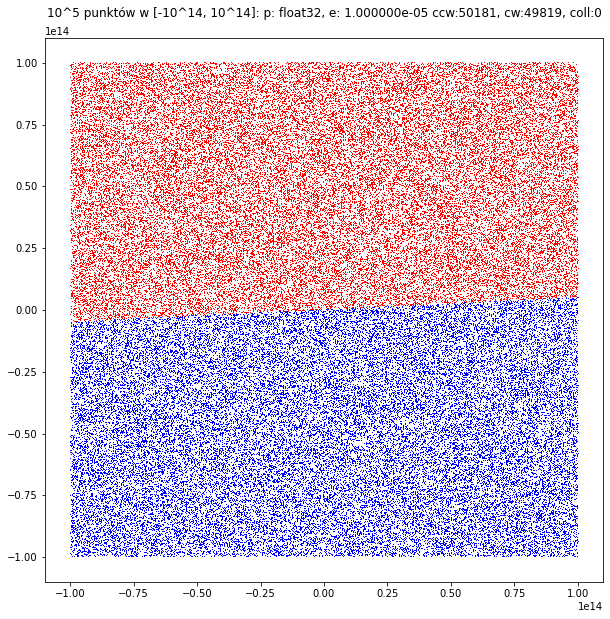

cnt:
float32,detOwn2,1.000000e-01,50179,49813,8
float32,detNP2,1.000000e-01,50177,49814,9
float32,detOwn3,1.000000e-01,50181,49819,0
float32,detNP3,1.000000e-01,50181,49819,0
diff:
detOwn2,detNP2,7
detOwn2,detOwn3,8
detOwn2,detNP3,8
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


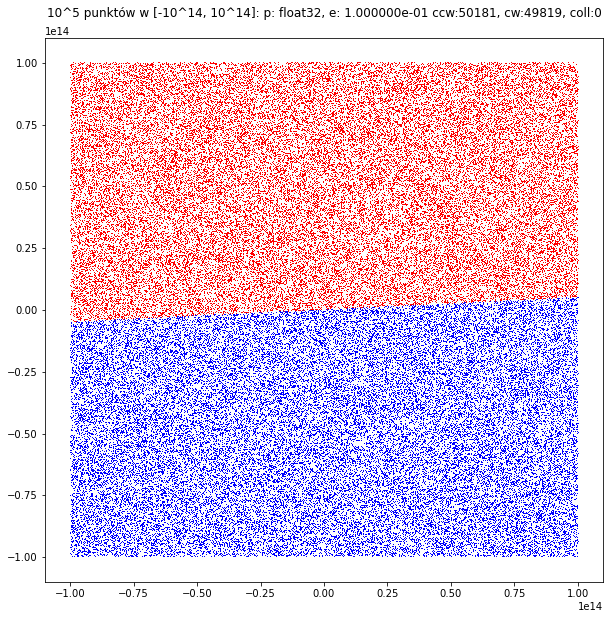

cnt:
float64,detOwn2,0.000000e+00,50178,49813,9
float64,detNP2,0.000000e+00,50177,49814,9
float64,detOwn3,0.000000e+00,50181,49819,0
float64,detNP3,0.000000e+00,50181,49819,0
diff:
detOwn2,detNP2,6
detOwn2,detOwn3,9
detOwn2,detNP3,9
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


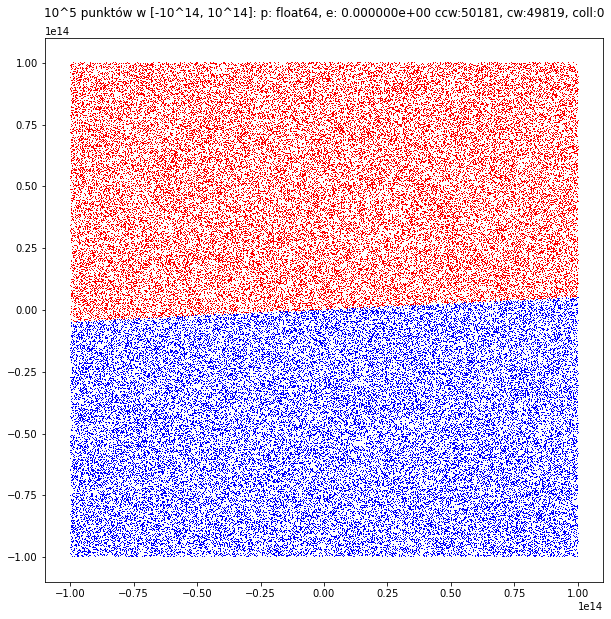

cnt:
float64,detOwn2,1.000000e-13,50178,49813,9
float64,detNP2,1.000000e-13,50177,49814,9
float64,detOwn3,1.000000e-13,50181,49819,0
float64,detNP3,1.000000e-13,50181,49819,0
diff:
detOwn2,detNP2,6
detOwn2,detOwn3,9
detOwn2,detNP3,9
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


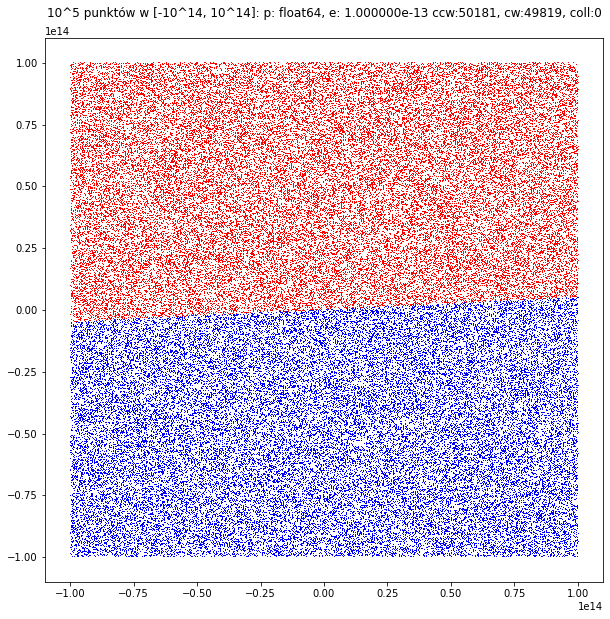

cnt:
float64,detOwn2,1.000000e-09,50178,49813,9
float64,detNP2,1.000000e-09,50177,49814,9
float64,detOwn3,1.000000e-09,50181,49819,0
float64,detNP3,1.000000e-09,50181,49819,0
diff:
detOwn2,detNP2,6
detOwn2,detOwn3,9
detOwn2,detNP3,9
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


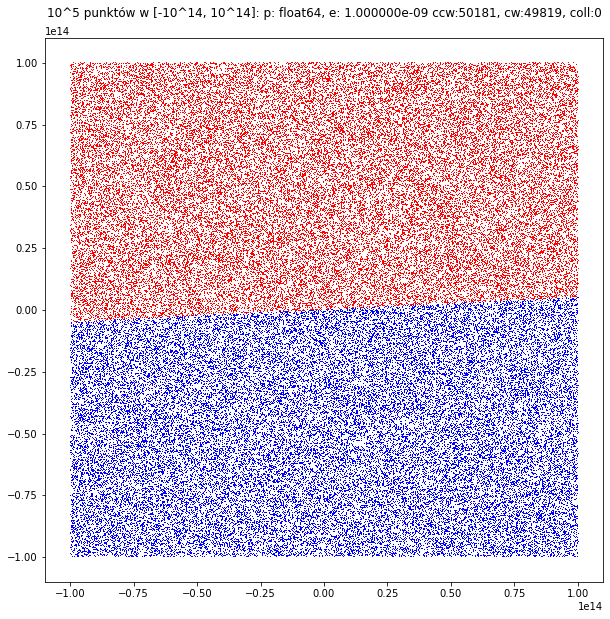

cnt:
float64,detOwn2,1.000000e-05,50178,49813,9
float64,detNP2,1.000000e-05,50177,49814,9
float64,detOwn3,1.000000e-05,50181,49819,0
float64,detNP3,1.000000e-05,50181,49819,0
diff:
detOwn2,detNP2,6
detOwn2,detOwn3,9
detOwn2,detNP3,9
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


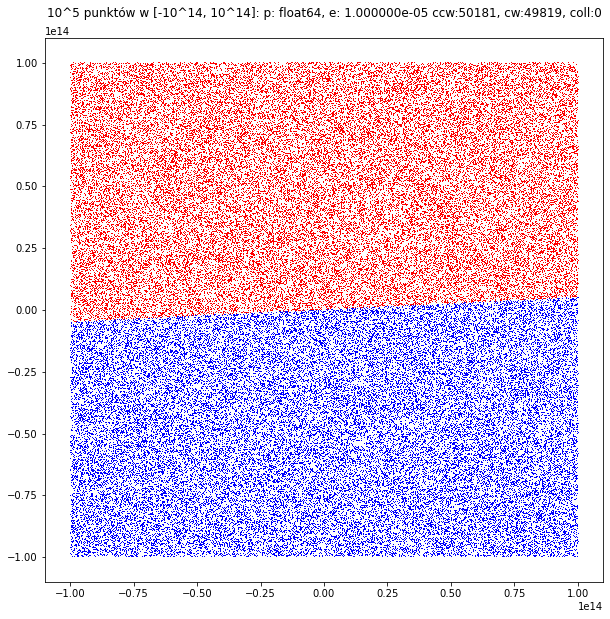

cnt:
float64,detOwn2,1.000000e-01,50178,49813,9
float64,detNP2,1.000000e-01,50177,49814,9
float64,detOwn3,1.000000e-01,50181,49819,0
float64,detNP3,1.000000e-01,50181,49819,0
diff:
detOwn2,detNP2,6
detOwn2,detOwn3,9
detOwn2,detNP3,9
detNP2,detOwn3,9
detNP2,detNP3,9
detOwn3,detNP3,0


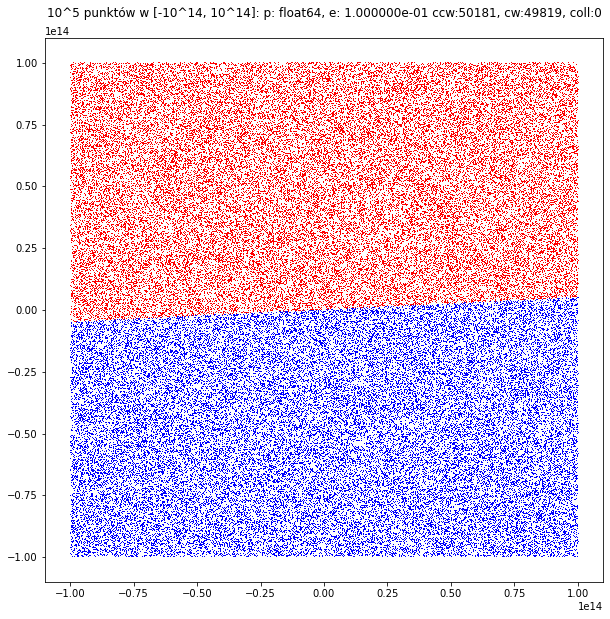

------Zbiór danych: 1000 punktów na promieniu R=100
cnt:
float32,detOwn2,0.000000e+00,471,529,0
float32,detNP2,0.000000e+00,471,529,0
float32,detOwn3,0.000000e+00,471,529,0
float32,detNP3,0.000000e+00,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


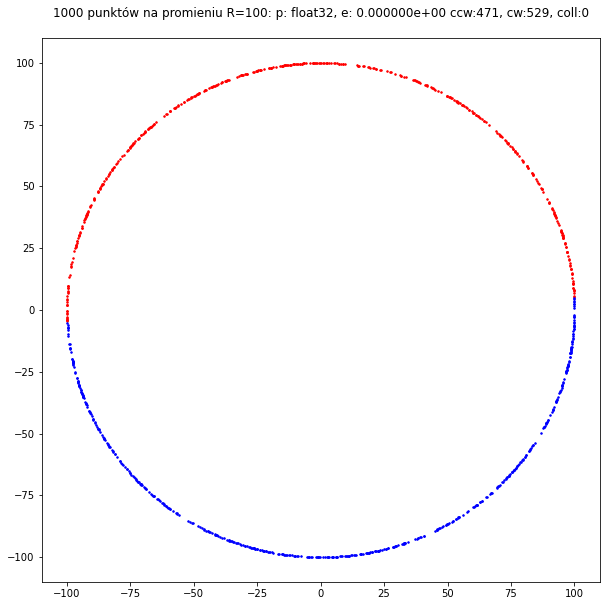

cnt:
float32,detOwn2,1.000000e-13,471,529,0
float32,detNP2,1.000000e-13,471,529,0
float32,detOwn3,1.000000e-13,471,529,0
float32,detNP3,1.000000e-13,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


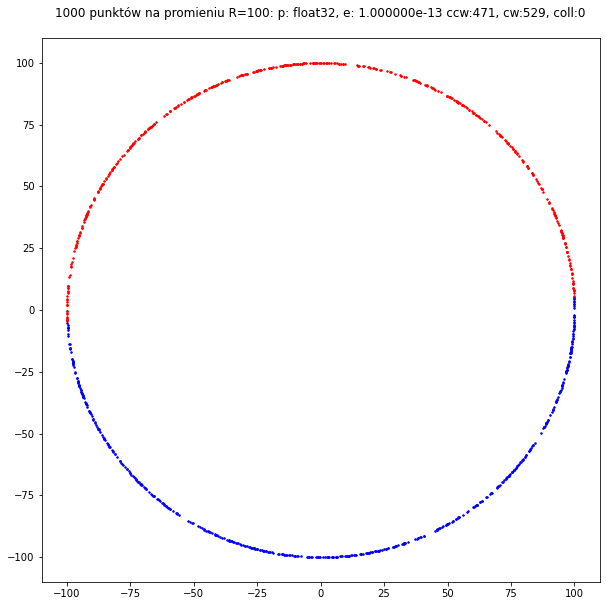

cnt:
float32,detOwn2,1.000000e-09,471,529,0
float32,detNP2,1.000000e-09,471,529,0
float32,detOwn3,1.000000e-09,471,529,0
float32,detNP3,1.000000e-09,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


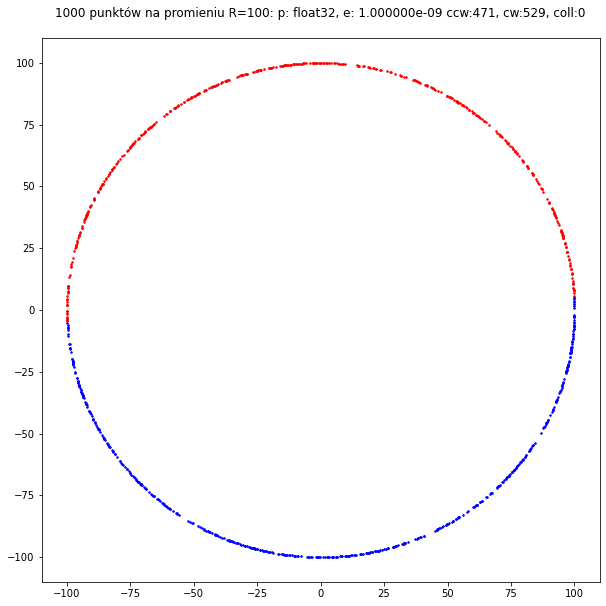

cnt:
float32,detOwn2,1.000000e-05,471,529,0
float32,detNP2,1.000000e-05,471,529,0
float32,detOwn3,1.000000e-05,471,529,0
float32,detNP3,1.000000e-05,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


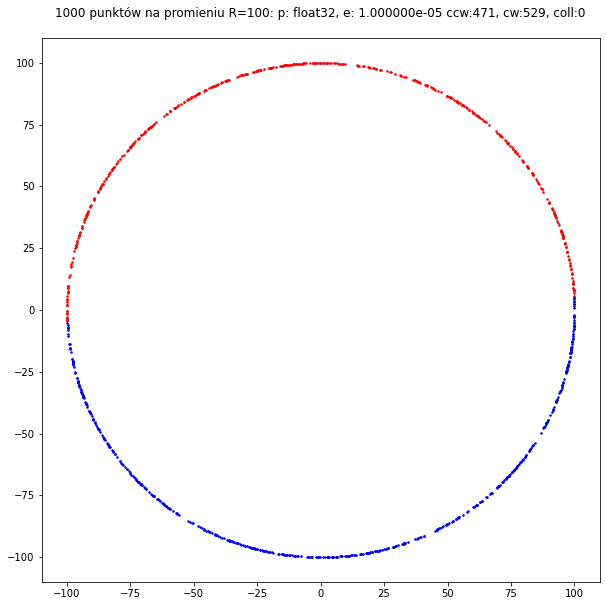

cnt:
float32,detOwn2,1.000000e-01,471,528,1
float32,detNP2,1.000000e-01,471,528,1
float32,detOwn3,1.000000e-01,471,528,1
float32,detNP3,1.000000e-01,471,528,1
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


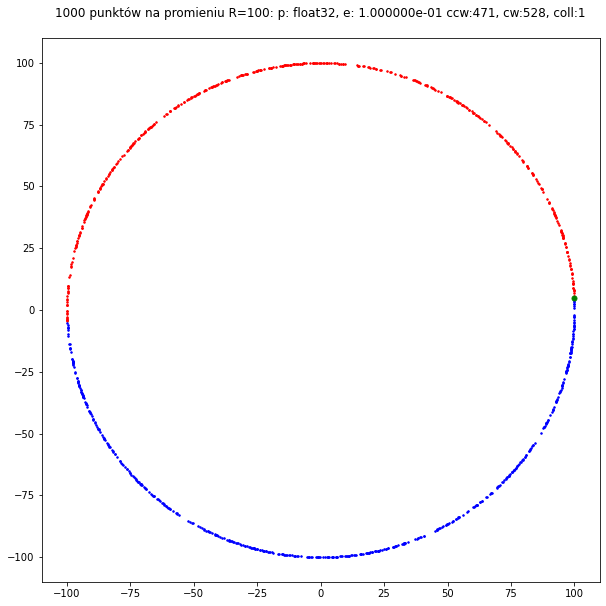

cnt:
float64,detOwn2,0.000000e+00,471,529,0
float64,detNP2,0.000000e+00,471,529,0
float64,detOwn3,0.000000e+00,471,529,0
float64,detNP3,0.000000e+00,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


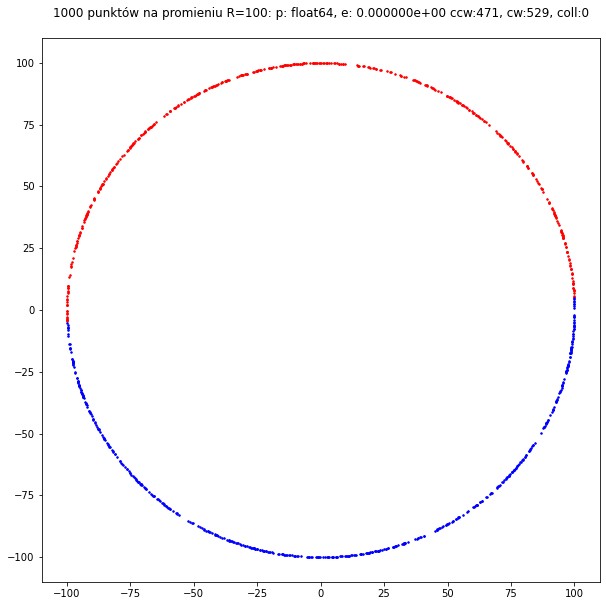

cnt:
float64,detOwn2,1.000000e-13,471,529,0
float64,detNP2,1.000000e-13,471,529,0
float64,detOwn3,1.000000e-13,471,529,0
float64,detNP3,1.000000e-13,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


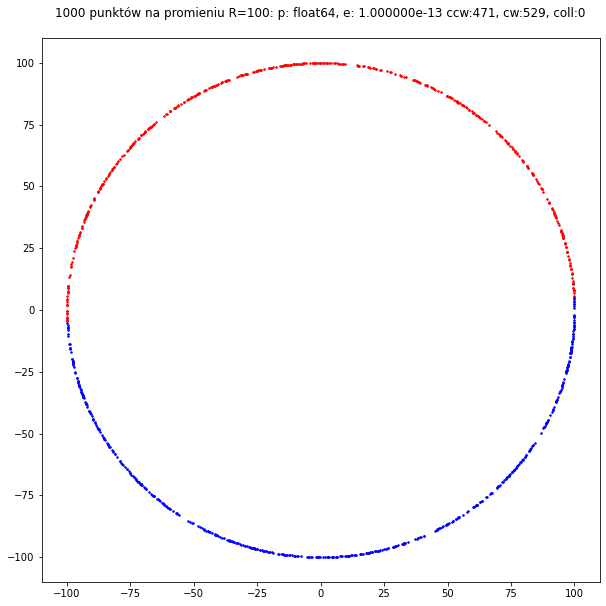

cnt:
float64,detOwn2,1.000000e-09,471,529,0
float64,detNP2,1.000000e-09,471,529,0
float64,detOwn3,1.000000e-09,471,529,0
float64,detNP3,1.000000e-09,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


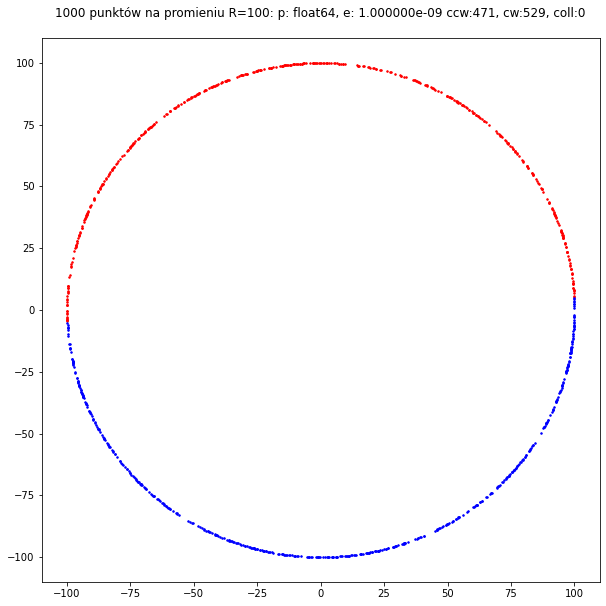

cnt:
float64,detOwn2,1.000000e-05,471,529,0
float64,detNP2,1.000000e-05,471,529,0
float64,detOwn3,1.000000e-05,471,529,0
float64,detNP3,1.000000e-05,471,529,0
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


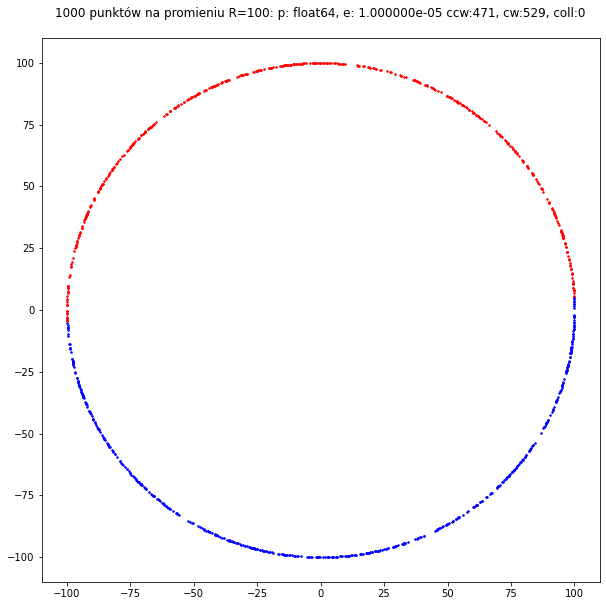

cnt:
float64,detOwn2,1.000000e-01,471,528,1
float64,detNP2,1.000000e-01,471,528,1
float64,detOwn3,1.000000e-01,471,528,1
float64,detNP3,1.000000e-01,471,528,1
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


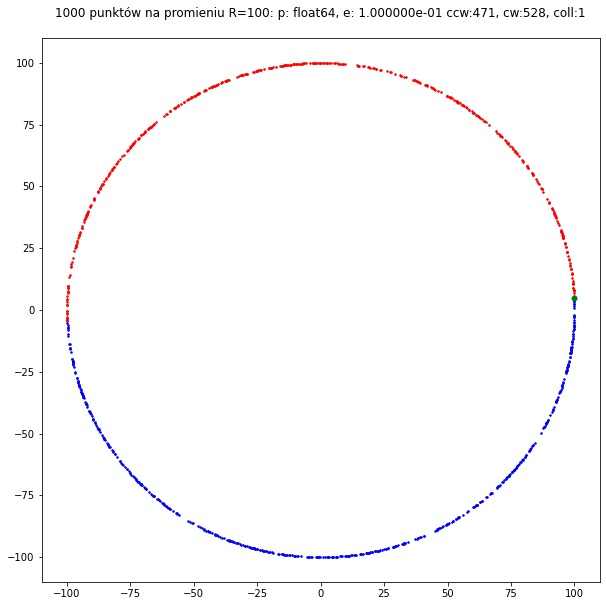

------Zbiór danych: 1000 punktów w [-1000, 1000] na prostej z wektora (a, b)
cnt:
float32,detOwn2,0.000000e+00,429,407,164
float32,detNP2,0.000000e+00,443,414,143
float32,detOwn3,0.000000e+00,474,466,60
float32,detNP3,0.000000e+00,494,445,61
diff:
detOwn2,detNP2,63
detOwn2,detOwn3,161
detOwn2,detNP3,137
detNP2,detOwn3,132
detNP2,detNP3,121
detOwn3,detNP3,97


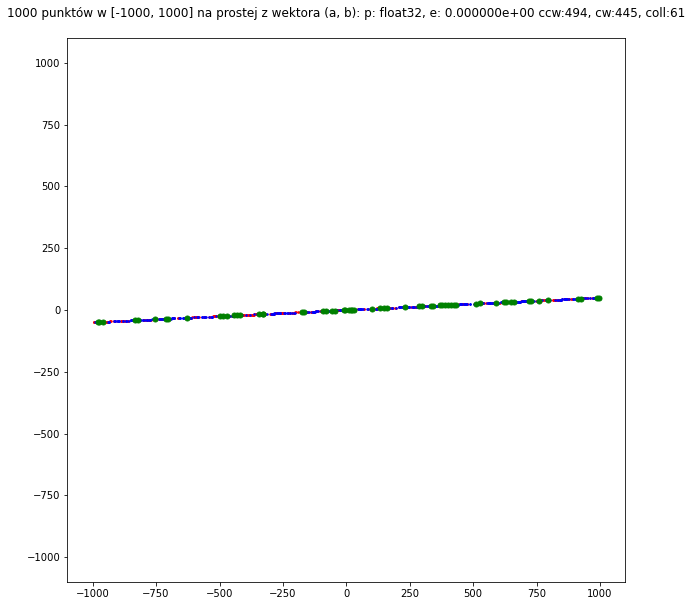

cnt:
float32,detOwn2,1.000000e-13,427,401,172
float32,detNP2,1.000000e-13,440,409,151
float32,detOwn3,1.000000e-13,416,388,196
float32,detNP3,1.000000e-13,416,388,196
diff:
detOwn2,detNP2,51
detOwn2,detOwn3,24
detOwn2,detNP3,24
detNP2,detOwn3,45
detNP2,detNP3,45
detOwn3,detNP3,0


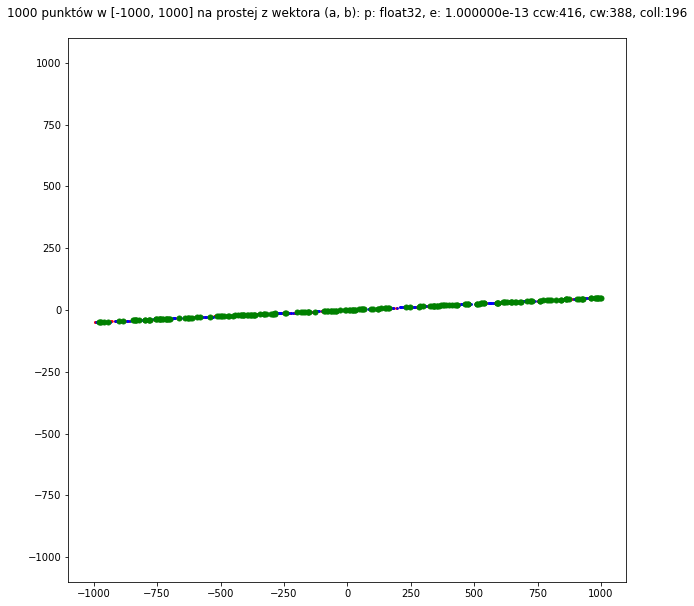

cnt:
float32,detOwn2,1.000000e-09,416,388,196
float32,detNP2,1.000000e-09,416,388,196
float32,detOwn3,1.000000e-09,416,388,196
float32,detNP3,1.000000e-09,416,388,196
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


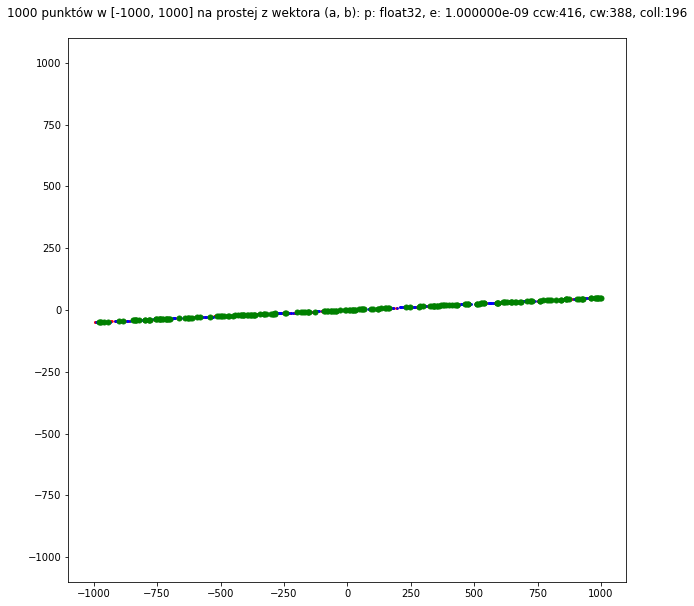

cnt:
float32,detOwn2,1.000000e-05,0,0,1000
float32,detNP2,1.000000e-05,0,0,1000
float32,detOwn3,1.000000e-05,0,0,1000
float32,detNP3,1.000000e-05,0,0,1000
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


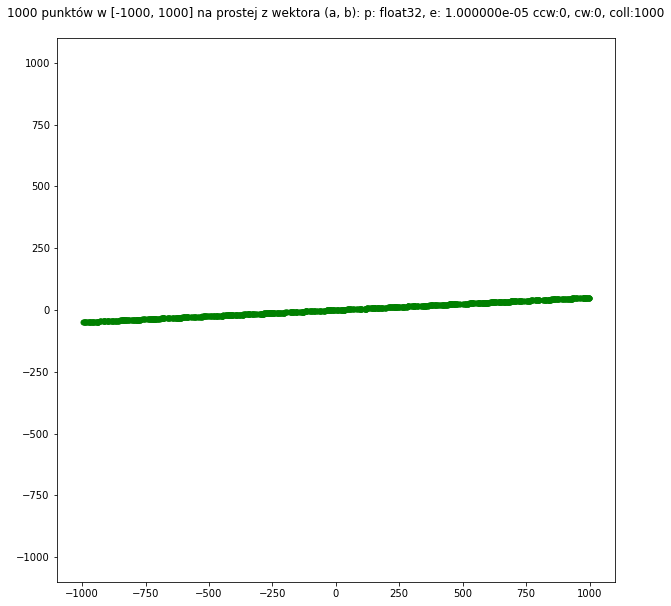

cnt:
float32,detOwn2,1.000000e-01,0,0,1000
float32,detNP2,1.000000e-01,0,0,1000
float32,detOwn3,1.000000e-01,0,0,1000
float32,detNP3,1.000000e-01,0,0,1000
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


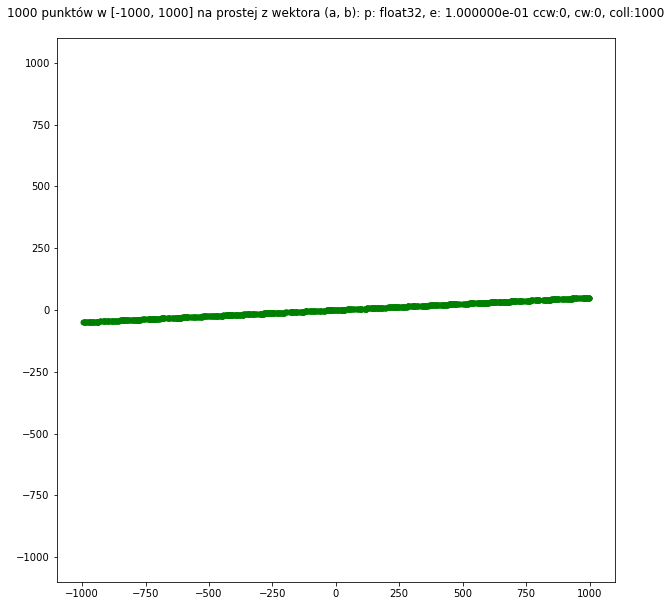

cnt:
float64,detOwn2,0.000000e+00,124,149,727
float64,detNP2,0.000000e+00,149,160,691
float64,detOwn3,0.000000e+00,173,386,441
float64,detNP3,0.000000e+00,391,308,301
diff:
detOwn2,detNP2,400
detOwn2,detOwn3,659
detOwn2,detNP3,681
detNP2,detOwn3,661
detNP2,detNP3,683
detOwn3,detNP3,558


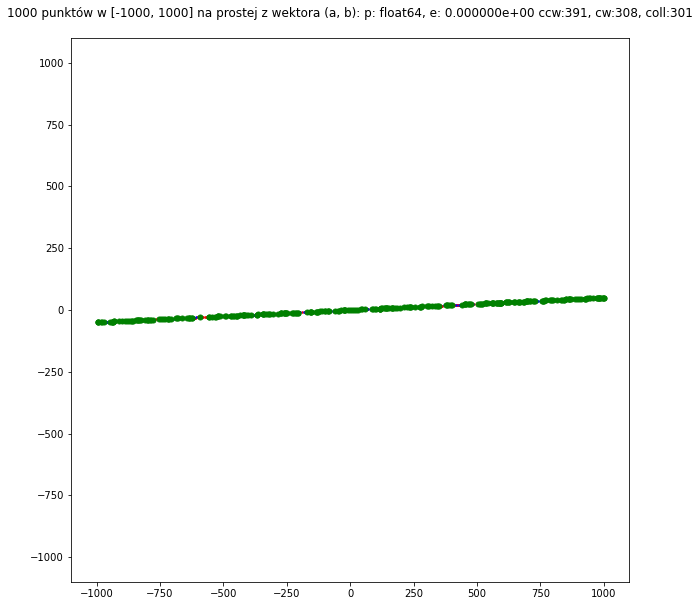

cnt:
float64,detOwn2,1.000000e-13,104,131,765
float64,detNP2,1.000000e-13,135,140,725
float64,detOwn3,1.000000e-13,0,0,1000
float64,detNP3,1.000000e-13,0,0,1000
diff:
detOwn2,detNP2,356
detOwn2,detOwn3,235
detOwn2,detNP3,235
detNP2,detOwn3,275
detNP2,detNP3,275
detOwn3,detNP3,0


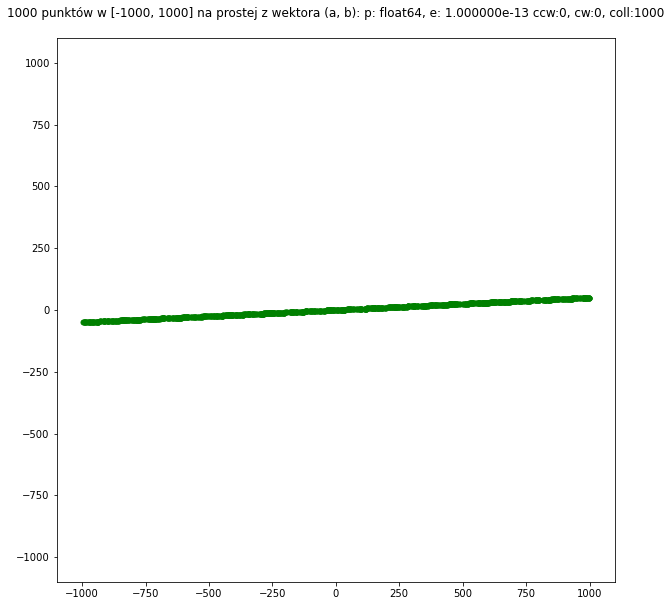

cnt:
float64,detOwn2,1.000000e-09,0,0,1000
float64,detNP2,1.000000e-09,0,0,1000
float64,detOwn3,1.000000e-09,0,0,1000
float64,detNP3,1.000000e-09,0,0,1000
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


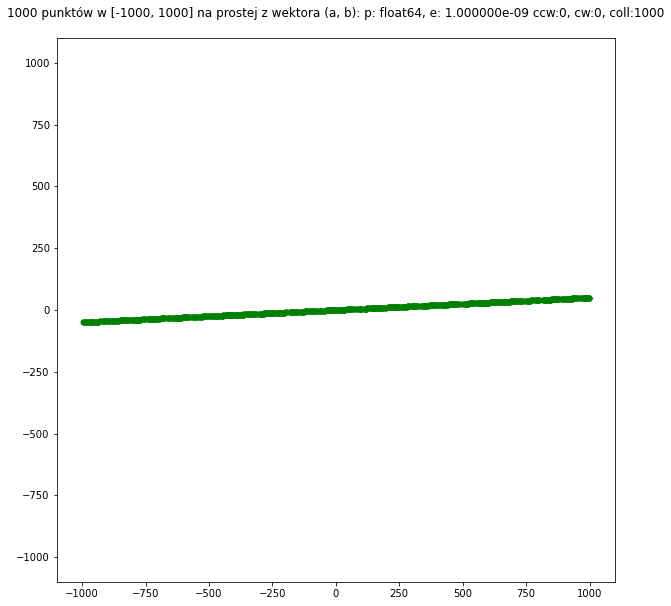

cnt:
float64,detOwn2,1.000000e-05,0,0,1000
float64,detNP2,1.000000e-05,0,0,1000
float64,detOwn3,1.000000e-05,0,0,1000
float64,detNP3,1.000000e-05,0,0,1000
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


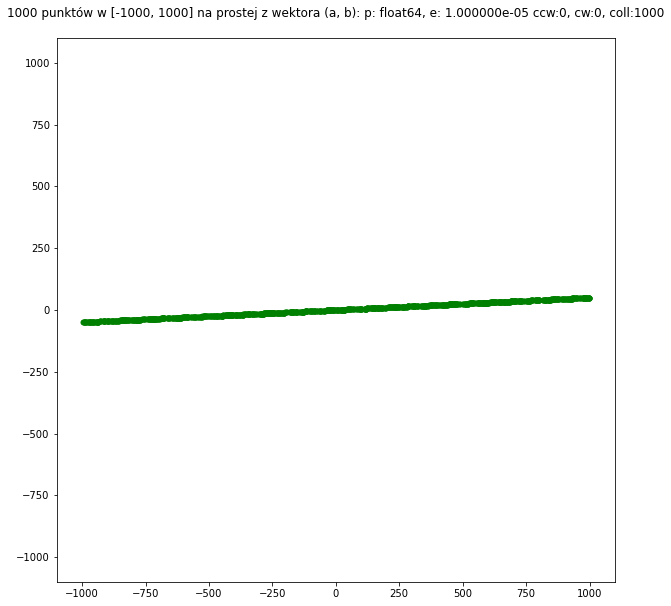

cnt:
float64,detOwn2,1.000000e-01,0,0,1000
float64,detNP2,1.000000e-01,0,0,1000
float64,detOwn3,1.000000e-01,0,0,1000
float64,detNP3,1.000000e-01,0,0,1000
diff:
detOwn2,detNP2,0
detOwn2,detOwn3,0
detOwn2,detNP3,0
detNP2,detOwn3,0
detNP2,detNP3,0
detOwn3,detNP3,0


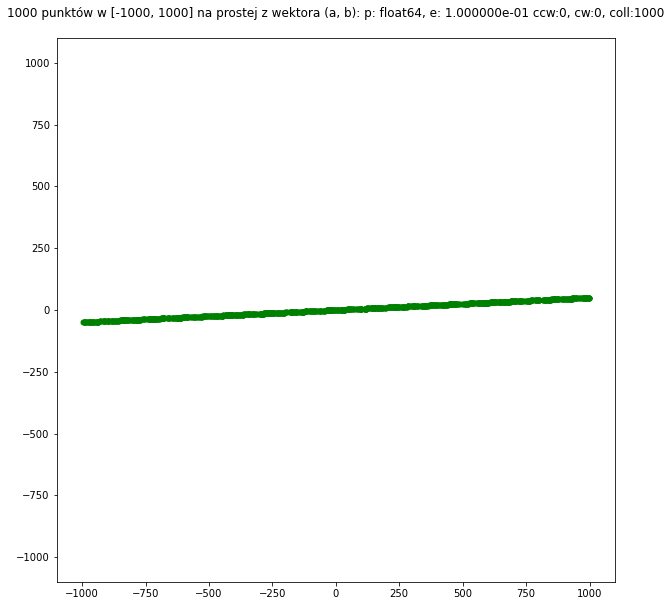

In [7]:
# determinant NumPy 2x2
def detNP2(a, b, c):
    m = np.array([
        [a[0] - c[0], a[1] - c[1]],
        [b[0] - c[0], b[1] - c[1]]
    ])
    
    return np.linalg.det(m)

# determinant NumPy 3x3
def detNP3(a, b, c):
    m = np.array([
        [a[0], a[1], 1],
        [b[0], b[1], 1],
        [c[0], c[1], 1]
    ])
    
    return np.linalg.det(m)

# determinant self-implemented 2x2
def detOwn2(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (b[0] - c[0]) * (a[1] - c[1])

# determinant self-implemented 3x3
def detOwn3(a, b, c):
    return (a[0] * b[1] * 1) + (a[1] * 1 * c[0]) + (1 * b[0] * c[1]) - (c[0] * b[1] * 1) - (b[0] * a[1] * 1) - (a[0] * c[1] * 1)

# classifies points by its clockwiseness, returns list of tuples(x, y, class)
def classifyPoints(x, y, a, b, detFn, epsilon):
    res = []
    
    for c in zip(x, y):
        det = detFn(a, b, c)
        if det < -epsilon:
            res.append((c[0], c[1], 0))
        elif det <= epsilon:
            res.append((c[0], c[1], 1))
        else:
            res.append((c[0], c[1], 2))
    
    return res

a = [-1.0, 0.0]
b = [1.0, 0.1]

for dataset in [
    {
        "title": "10^5 punktów w [-1000, 1000]",
        "pointsSrc": generatePointsRect(-1000, 1000, -1000, 1000, 10 ** 5, "float64"),
        "limits": [-1000, 1000, -1000, 1000],
        "marker": (",", 1)
    },
    {
        "title": "10^5 punktów w [-10^14, 10^14]",
        "pointsSrc": generatePointsRect(-10 ** 14, 10 ** 14, -10 ** 14, 10 ** 14, 10 ** 5, "float64"),
        "limits": [-10 ** 14, 10 ** 14, -10 ** 14, 10 ** 14],
        "marker": (",", 1)
    },
    {
        "title": "1000 punktów na promieniu R=100",
        "pointsSrc": generatePointsCircle(100, 1000, "float64"),
        "limits": [-100, 100, -100, 100],
        "marker": (".", 3)
    },
    {
        "title": "1000 punktów w [-1000, 1000] na prostej z wektora (a, b)",
        "pointsSrc": generatePointsLine(*a, *b, 1000, 1000, "float64"),
        "limits": [-1000, 1000, -1000, 1000],
        "marker": (".", 3)
    }
]:
    title = dataset["title"]
    print(f"------Zbiór danych: {title}")
    for precision in ["float32", "float64"]:
        x_fp64, y_fp64 = dataset["pointsSrc"]
        x = x_fp64.astype(precision)
        y = y_fp64.astype(precision)
        
        for epsilon in [0, 10 ** -13, 10 ** -9, 10 ** -5, 10 ** -1]:
            detNames = ["detOwn2", "detNP2", "detOwn3", "detNP3"]
            pointsHist = [None] * 4
            print("cnt:")
            for i, detFn in enumerate([detOwn2, detNP2, detOwn3, detNP3]):
                fnName = detNames[i]
                points = classifyPoints(x, y, a, b, detFn, epsilon)
                pointsHist[i] = points
                
                cw = list(map(lambda x: (x[0], x[1]), filter(lambda x: x[2] == 0, points)))
                [cwX, cwY] = [[], []] if len(cw) == 0 else zip(*cw)
                
                coll = list(map(lambda x: (x[0], x[1]), filter(lambda x: x[2] == 1, points)))
                [collX, collY] = [[], []] if len(coll) == 0 else zip(*coll)
                
                ccw = list(map(lambda x: (x[0], x[1]), filter(lambda x: x[2] == 2, points)))
                [ccwX, ccwY] = [[], []] if len(ccw) == 0 else zip(*ccw)
                
                print(f"{precision},{fnName},{epsilon:e},{len(ccw)},{len(cw)},{len(coll)}")
                if fnName == "detNP3":
                    marker = dataset["marker"][0]
                    markerSize = dataset["marker"][1]
                    
                    plt.close()
                    
                    scaleAxes(dataset["limits"], 1.1)
                    
                    plt.title(f"{title}: p: {precision}, e: {epsilon:e} ccw:{len(ccwX)}, cw:{len(cwX)}, coll:{len(collX)}\n")
                    
                    plt.plot(ccwX, ccwY, marker, ms=markerSize, mfc='r', mec='r')
                    plt.plot(cwX, cwY, marker, ms=markerSize, mfc='b', mec='b')
                    plt.plot(collX, collY, ".", ms=10, mfc='g', mec='g')
                    
            print("diff:")
            for left in range(3):
                for right in range(left + 1, 4):
                    diff = 0
                    for l, p in zip(pointsHist[left], pointsHist[right]):
                        if l[2] != p[2]:
                            diff += 1
                            
                    print(f"{detNames[left]},{detNames[right]},{diff}")
                    
            plt.show()